# Task 2 - Eigenfaces: Facial Feature Extraction and Representation (Using a Subset of Olivetti Dataset)

**Context:** Principal Component Analysis (PCA) is a dimensionality reduction method that is often used to reduce the dimensionality of datasets, by transforming a large set of variables into a smaller one, while preserving as much variance as possible. There are two methods for performing a Principal Component Analysis: using Eigenvector Decomposition (EIG) and the more generalized Singular Value Decomposition (SVD). The Eigenfaces technique applies PCA to face images to extract key features (eigenfaces) for tasks like facial feature extraction and representation.

**Input:** In this exercise, you will use a specific subset of 5 subjects from the Olivetti Faces dataset (Subject IDs: 1, 10, 29, 33, 38). The images will be preprocessed (flattened) to serve as input for PCA and NMF.

**Objective:** Implement PCA from scratch (Eigenfaces) on this subset, compare with Scikit-learn's PCA, explain the curse of dimensionality, and apply Non-Negative Matrix Factorization (NMF) to this face data subset. **Please use `random_state=42` where applicable for reproducibility.**

In [1]:
# TODO: uncomment and import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import silhouette_score # Optional: if you want to measure separation
# import time

# Please use random_state=42 for all operations involving randomness to ensure reproducibility.

## Data Loading and Preprocessing for Selected Subjects

Load the Olivetti Faces dataset and filter it to include only subjects with IDs (1, 10, 29, 33, 38). The images are then flattened. Remember to use `random_state=42` when fetching the data if shuffle is True.

Using fixed subject IDs for the assignment: (1, 10, 29, 33, 38)
4096
50


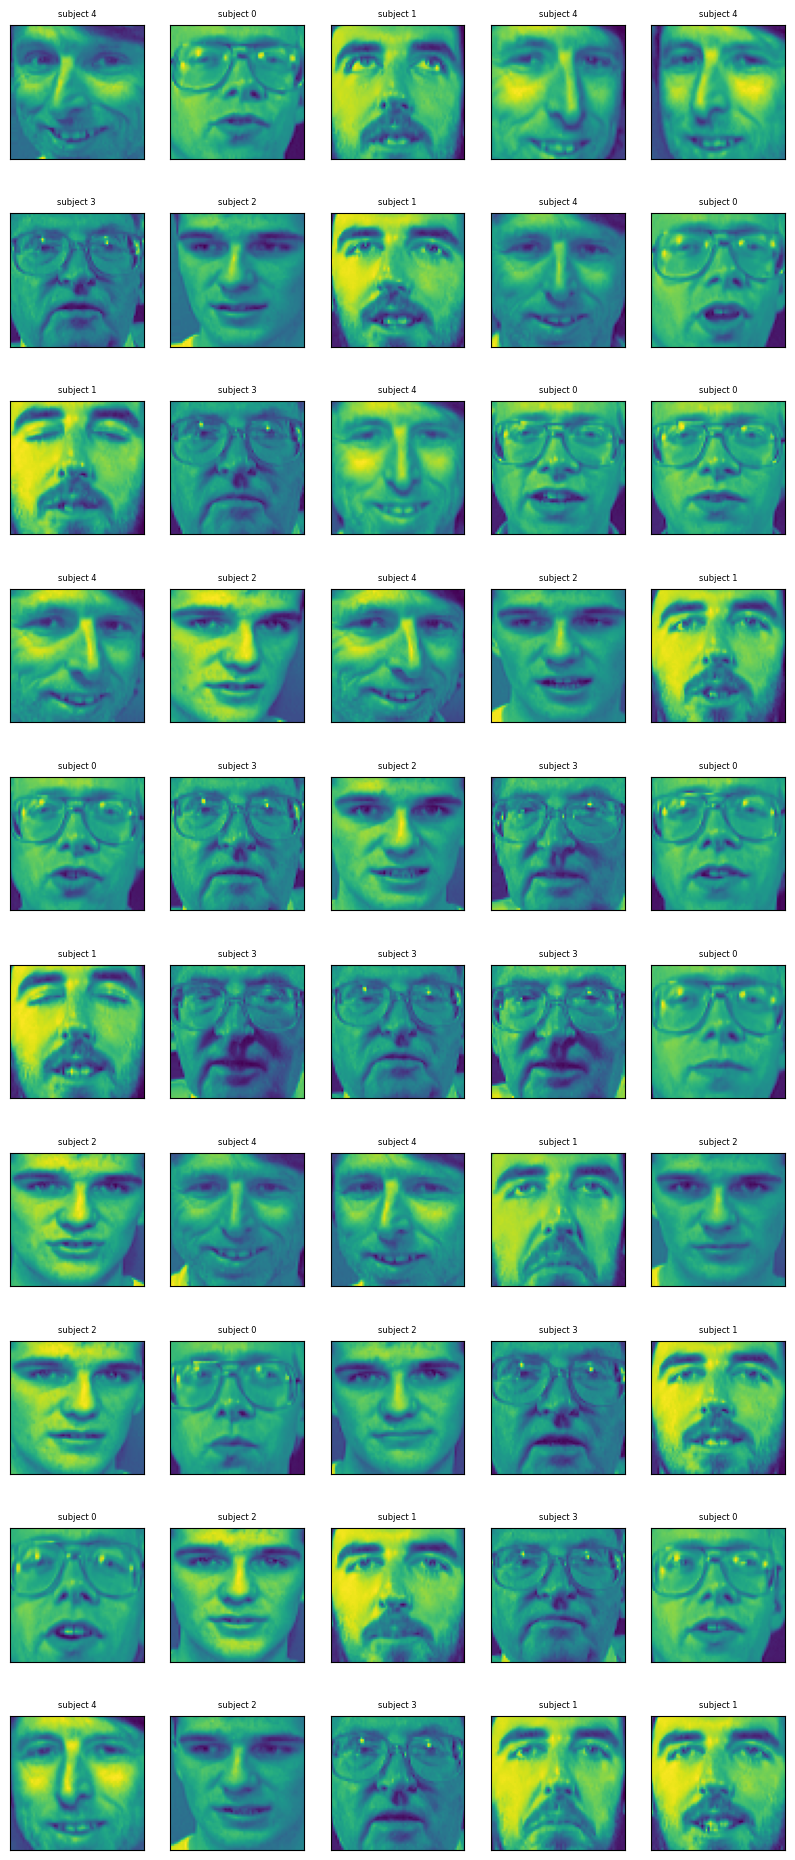

In [2]:
# TODO: Load Olivetti faces dataset and filter for specific subjects
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X_all_subjects = data.data
y_all_subjects = data.target

fixed_subject_ids = (1, 10, 29, 33, 38)
print(f"Using fixed subject IDs for the assignment: {fixed_subject_ids}")

# TODO: Filter X_all_subjects and y_all_subjects for fixed_subject_ids to get X and y
X = []
y_temp = []
for i in range(len(X_all_subjects)):
    if y_all_subjects[i] in fixed_subject_ids:
        X.append(X_all_subjects[i])
        y_temp.append(y_all_subjects[i])

# TODO: Remap y_original_labels to 0-(n_classes-1) for y
y = []
for y_value in y_temp:
    y.append(fixed_subject_ids.index(y_value))

# TODO: Plot a sample gallery of the selected subjects
print(len(X[0]))
print(len(y))
def plot_gallery(X, y):
    plt.figure(figsize=(10, 24))
    for i in range(len(X)):
        plt.subplot(10, 5, i + 1)
        plt.imshow(np.array(X)[i].reshape((64, 64)))
        plt.title(f"subject {y[i]}", size=6)
        plt.xticks(())
        plt.yticks(())
    plt.show()
plot_gallery(X, y)

## 2.1 Eigenfaces Implementation (Adapted from PCA)

Apply PCA to the selected 5-subject subset. Use `random_state=42` in sklearn's PCA.

### 2.1.1 Implement Eigenfaces from scratch (via SVD). Visualize the top eigenfaces and project the dataset onto the first two principal components. (10 points)

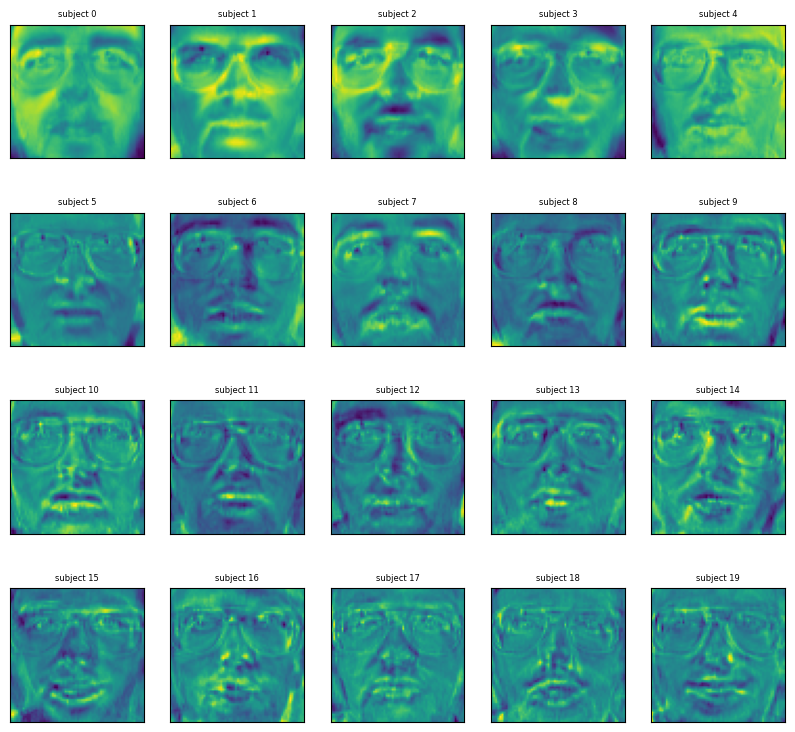

In [3]:
# TODO: Implement PCA from scratch on the 5-subject subset (X, y)
# 1. Calculate the mean face
X = np.array(X)
y = np.array(y)
mean_face = np.mean(X, axis=0)

# 2. Center the data
X_centered = X - mean_face

# 3. Perform SVD
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
eigenfaces_scratch = Vt

# 4. Visualize the top eigenfaces (use plot_gallery)
plot_gallery(eigenfaces_scratch[:20], np.arange(20))

# 5. Project the centered data onto the first two principal components
X_pca_scratch = np.dot(X_centered, eigenfaces_scratch[:2].T)

### 2.1.2 Compare your results with the PCA algorithm of sklearn. (6 points)
- Run sklearn's PCA on the 5-subject face subset. Project the data onto the first two principal components. Use `random_state=42`.
- Create scatter plots for the results (your implementation and sklearn's). Colour the points by their corresponding subject ID (target).

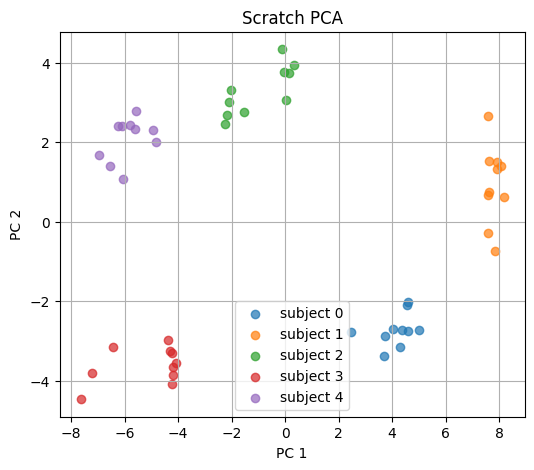

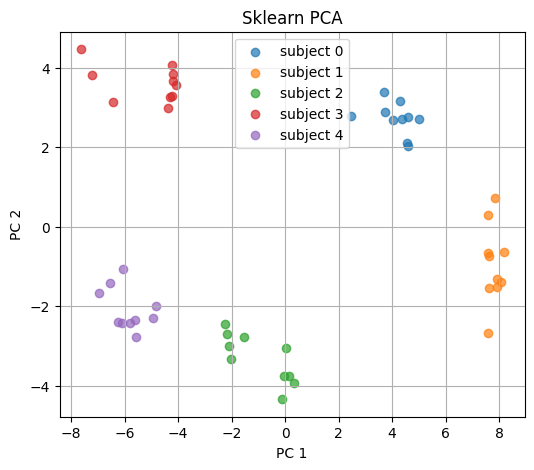

In [4]:
# TODO: Fit PCA using sklearn on the 5-subject subset (X,y)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Project to 2D for plotting using sklearn PCA
# Helper function to plot PCA results
def scatter_pca(X_pca, y, title):
    plt.figure(figsize=(6, 5))
    for label in np.unique(y):
        plt.scatter(
            X_pca[y == label, 0],
            X_pca[y == label, 1],
            label=f"subject {label}",
            alpha=0.7
        )
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# TODO: Create scatter plots for comparison
scatter_pca(X_pca_scratch, y, "Scratch PCA")
scatter_pca(X_pca, y, "Sklearn PCA")

## 2.2 Briefly explain the “curse of dimensionality” problem and the importance of PCA (Eigenfaces) in it. (5 points)

Write the answer in your words but support it by citing at least 1 reference. (Do not use AI tools.)

Source: https://niranjanappaji.medium.com/addressing-the-curse-of-dimensionality-unveiling-pcas-power-247956bc9a4d

1. What is the curse of dimensionality:
   The curse of dimentionality refers to the fact that when using high dimensions, the distance between data points grows larger and larger. The data ends up being so sparse in that space, that no data point is truly close to any other point, meaning that distance/ closeness methods such as k-means greatly suffer and aren't really able to give accurate result. From the view point of the k-means algorith "All points have about the same distance from point A and are thus all are either neighboors or not!" thus classification/ clustering becomes extremely tedious.

2. The importance of PCA to combat the curse of dimensionality:
   PCA can combat the curse of dimensionality for 2 reasons: 1. It reduces the feature space by employing feature extraction, 2. It is able to reserve the most useful information about the data points. In other words not only does it reduce the feature space but it also reserves most of the important information regarding data points and is thus able to cluster them much more accurately.

## 2.3 Non-Negative Matrix Factorization (NMF) for Faces (6 points)

Apply NMF on the 5-subject face subset. Create a scatter plot of the solutions projected onto 2 components. You can use the NMF implementation from `sklearn.decomposition`. Before using NMF, scale the data appropriately. Use `random_state=42` for NMF.

c:\Users\matsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


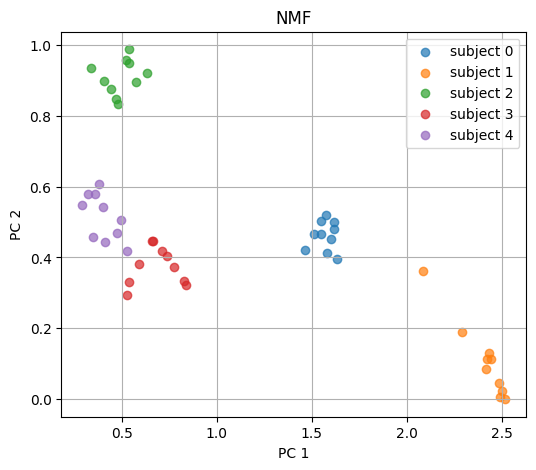

In [5]:
# TODO: Apply NMF to the 5-subject face subset (X,y)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

nmf = NMF(n_components=2, init="nndsvda", random_state=42)
X_nmf = nmf.fit_transform(X_scaled)

# TODO: Create scatter plot for NMF
scatter_pca(X_nmf, y, "NMF")